# 2019 2nd ML month with KaKR
## 목차
- **데이터 탐색**
    - 문제 정의
    - 변수 설명
    - 시각화
    - 이상치 및 결측치 확인
    - 유니크 갯수
- **데이터 전처리**
    - 이상치 및 결측치 처리
    - 정규화
- **변수 생성**
- 모델링
    - 회귀
    - GBM
    - 앙상블
- 잔차 분석

### 1. 데이터 탐색
#### 1.1 문제 정의

In [1]:
# Loding packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
# jupyter-lab dark theme for plot
from jupyterthemes import jtplot
jtplot.style('onedork')

In [3]:
# !kaggle competitions download -c 2019-2nd-ml-month-with-kakr

In [4]:
df_train = pd.read_csv('train.csv', parse_dates=['date'])
df_test = pd.read_csv('test.csv', parse_dates=['date'])

In [5]:
print(df_train.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


훈련데이터와 시험데이터의 크기는 각각 15035, 6468으로 적은편이고, 비율이 5:2로 심하게 불균등하지는 않다. 변수의 갯수가 20개로 적은 편이어서 좋은 피쳐를 만들어내는 것이 모델 성능에 관건으로 생각된다.

#### 1.2 변수 설명
* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : Has been viewed
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음

In [6]:
df_train.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


* date의 경우 yyyy-mm-dd + T000000의 형태로 내가 필요한 건 앞의 8자리이다.
* yr_renovated의 경우 0의 값이 보이는데, 0년도에 건축되었다는 의미가 아니라 재건축을 하지 않았다는 의미이다.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null datetime64[ns]
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 2.4 MB


#### 1.3 변수 시각화(목적 변수)

In [8]:
# describe statistics summery
df_train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

* 목적 변수의 경우 최솟값(min)과 최댓값(max)의 차이가 크고, 표준 편차(std)가 굉장히 큰 편이다.

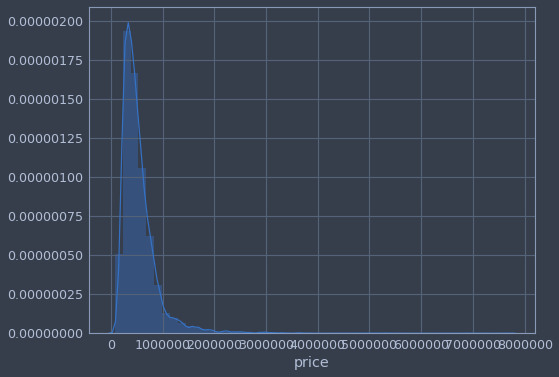

In [9]:
# histogram
plt.figure(figsize=(8,6))
sns.distplot(a=df_train['price'])

* 가격이 낮은 쪽에 굉장히 치우친 것을 확인이 가능하다.

In [10]:
# skewness and krutosis
print('Skewness:', df_train['price'].skew())
print('Kurtosis:', df_train['price'].kurt())

Skewness: 4.290252396939529
Kurtosis: 40.15491919350329


* 왜도(skewness) : 데이터 분포가 얼마나 치우쳤는지 보여주는 척도로서, 왼쪽으로 꼬리가 길수록 음수 방향으로 값이 커지고, 오른쪽으로 꼬리가 길수록 양수 방향으로 값이 커진다.
* 첨도(kurtosis) : 데이터 분포가 분포 가운데에 얼마나 몰려있는지 보여주는 척도로서, 첨도 값(K)이 3에 가까울 경우 그래프는 정규분포에 가깝고, (K<3)이면 정규분포보다 더 평탄하다고 판단할 수 있으며, (K>3)인 경우 정규분포보다 더 뾰족한 분포로 간주 할 수 있다.
<br><br>
위의 목적 변수의 경우 왜도도 정규분포를 따르지 않고 분산 또한 매우 큰것을 확인할 수 있다. 회귀 모델 사용을 위해 정규화(Normalize)를 통해 price의 분포가 정규분포에 가깝도록 가공해 줄 것이다.

((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([11.26447693, 11.28979441, 11.30221678, ..., 15.74485584,
         15.7703098 , 15.85673102])),
 (0.5246386762816584, 13.04812230186611, 0.9944175231748045))

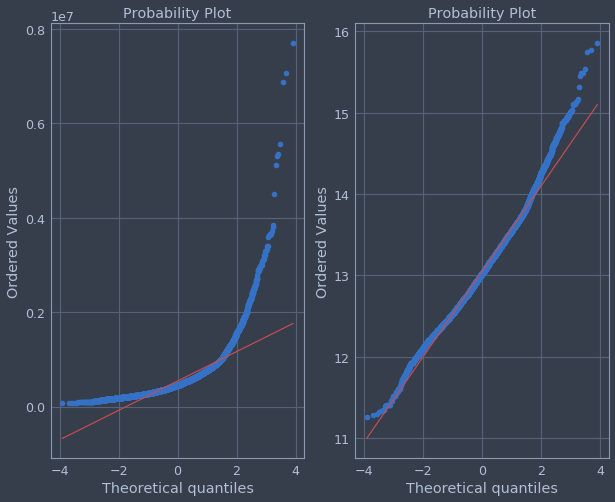

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,8)
stats.probplot(x=df_train['price'], plot=axes[0])
stats.probplot(x=np.log1p(df_train['price']), plot=axes[1])

log를 취해주면 기존보다 더 정규성을 가지는 것을 확인할 수 있다.

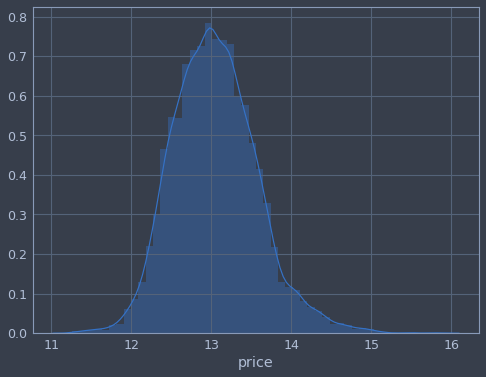

In [12]:
df_train['price'] = np.log1p(df_train['price'])
# histogram
plt.figure(figsize=(8,6))
sns.distplot(a=df_train['price'])

In [13]:
# skewness and krutosis
print('Skewness:', df_train['price'].skew())
print('Kurtosis:', df_train['price'].kurt())

Skewness: 0.4330991387067915
Kurtosis: 0.7316049825519855


* 정규분포에 가까워 졌다.

#### 1.3 변수 시각화(반응변수)
* 피어슨 상관관계 : 연속형 변수에 사용
* 스피어만 순위 상관관계 : 범주형 변수도 포함되었을 경우에 사용
<br><br>
아래는 목적변수인 가격과 가장 상관관계가 높은 순서대로 스피어만 순위 상관관계를 본 히트맵이다. 편의를 위해 상관도가 높은 상위 10개의 값만 보기로 하자.

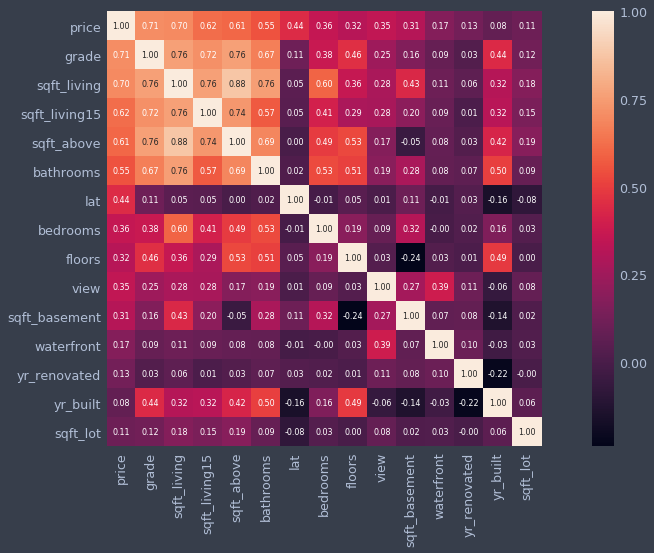

In [14]:
# saleprice correlation matrix
k = 15 # number of variables for heatmap
corrmat = abs(df_train.corr(method='spearman')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'price').index # nlargest : return this many descending sorted values
cm = np.corrcoef(df_train[cols].values.T) # correlation 특정 칼럼에 대해서

fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(data=cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)

목적변수와 상관도가 높은 변수는 집의 등급 - 주거공간의 크기 - 전체 크기순이고, 위도를 뜻하는 lat라는 값도 들어있다. 양의 상관관계인것을 보니 위도가 증가할수록 가격의 값이 증가한다는 뜻인데, 왜 이렇것인지, 어떻게 활용할 수 있을지는 탐구가 필요할 듯 하다.
* 집의 평수가 넓을수록 등급도 함께 높아지는 경향이 있다.
* 그리고 이 등급은 가격에 큰 영향을 미친다.

In [15]:
# np.corrcoef(df_train[cols].values).shape

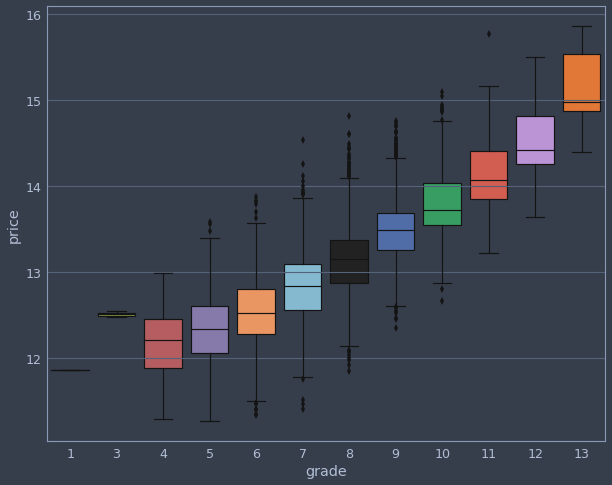

In [16]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data, x='grade', y='price', ax=ax)

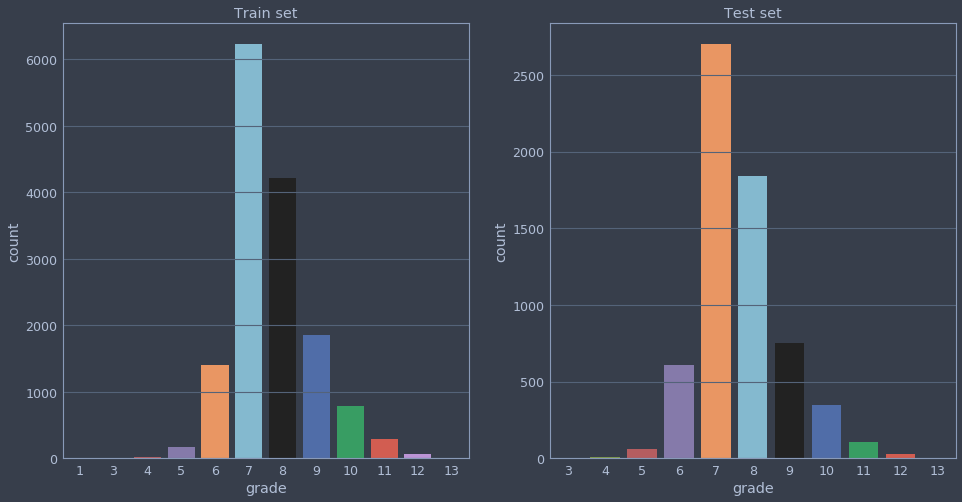

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].set(title='Train set')
sns.countplot(x='grade', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='grade', data=df_test, ax=ax[1])

집의 등급이 높으면 가격이 높아지는 것은 위의 히트맵에서도 봤듯이 당연한 결과이다. 그리고 전반적으로 상승곡선 형태도 보이고 있다. 하지만
* **등급 6,7,8,9 에서 이상치(outlier)가 많은 이유**
* **등급 8과 11에서 차이가 큰 이상치가 나타나는 이유**
<br>
위의 두가지는 좀 더 살펴볼 여지가 있어보인다.

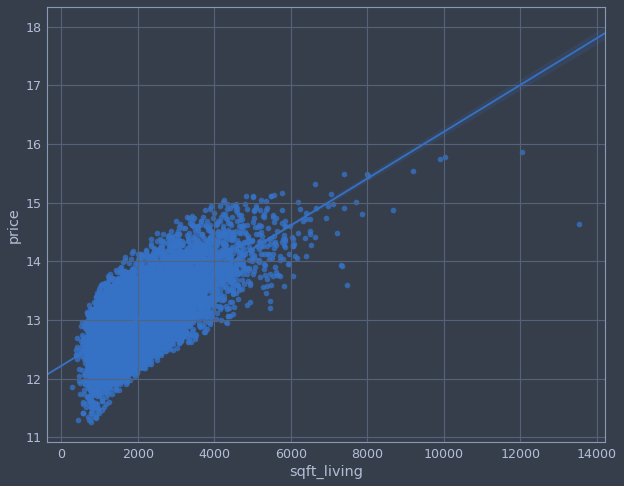

In [18]:
data = pd.concat([df_train['sqft_living'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_living', y='price', data=data, ax=ax)

전반적으로 선형성을 보이지만 선형성을 보이지만 가격 14~15 사이에 sqft_living이 14000이나 되는 값은 꽤나 이상한 값(이상치)으로 보인다. 제거할지 말지는 저 값을 확인해보고 결정해 보자.

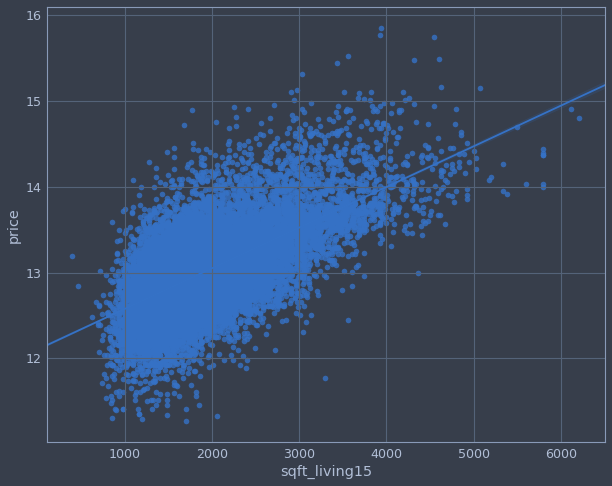

In [19]:
data = pd.concat([df_train['sqft_living15'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_living15', y='price', data=data, ax=ax)

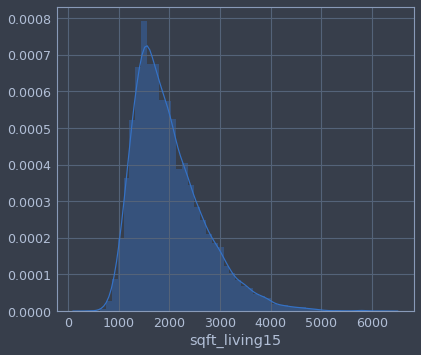

In [20]:
sns.distplot(a=df_train['sqft_living15'])

sqft_living15의 경우 15년도 기준이다보니 가격의 분산이 비교적 크다. 아무래도 재건축으로 인한 영향일것으로 생각되어지고 sqft_living15 그 자체를 사용하기보다는 적절한 Feature Engineering이 필요해 보인다.

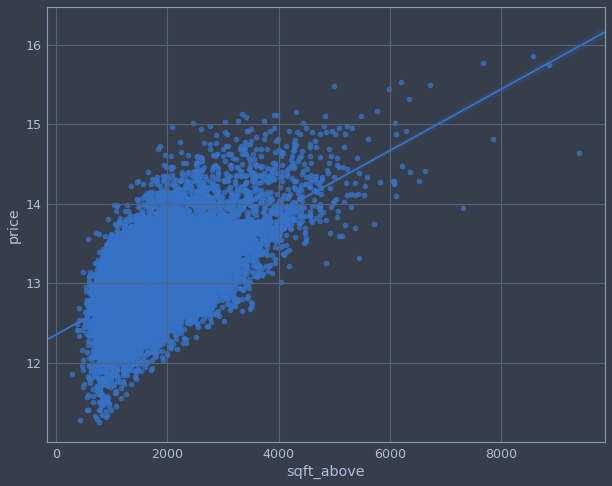

In [21]:
data = pd.concat([df_train['sqft_above'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_above', y='price', data=data)

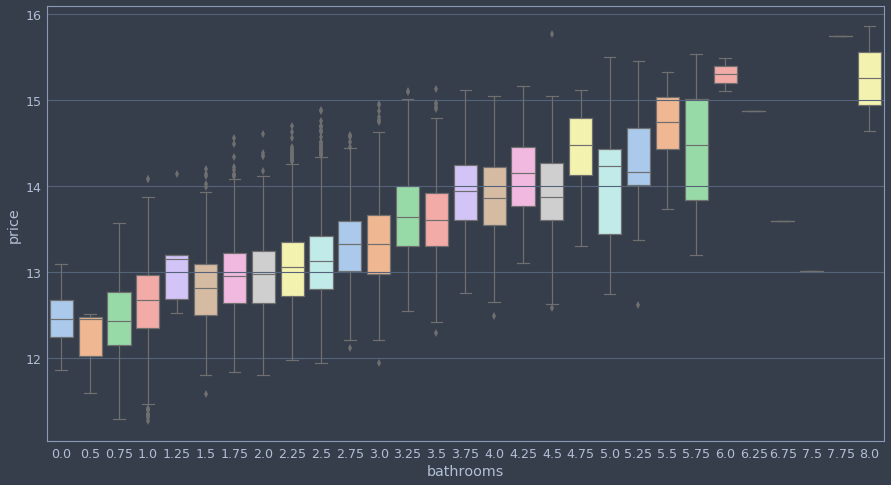

In [22]:
data = pd.concat([df_train['bathrooms'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(15,8))
sns.boxplot(x='bathrooms', y='price', data=data, palette=sns.color_palette('pastel'))

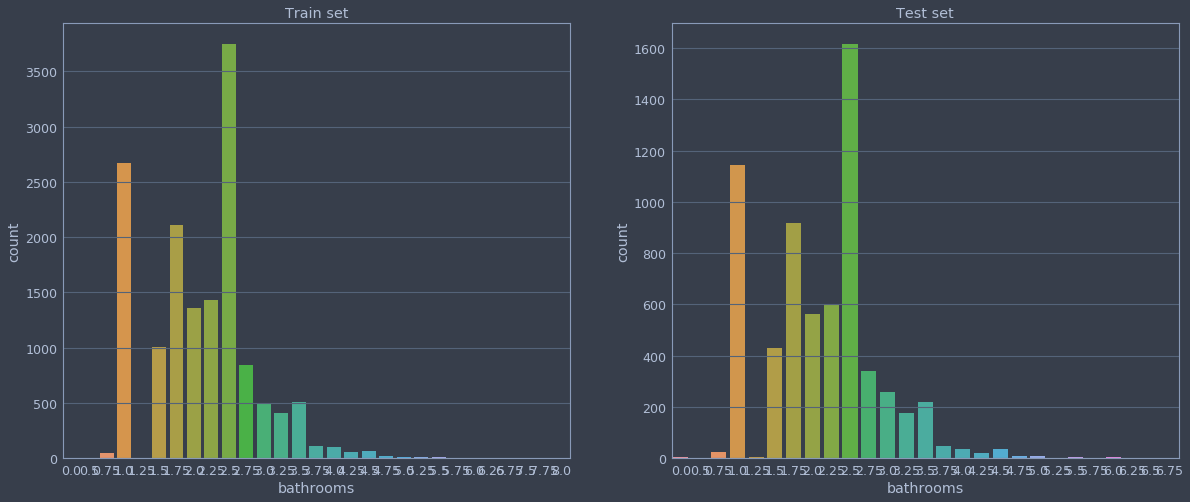

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0].set(title='Train set')
sns.countplot(x='bathrooms', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='bathrooms', data=df_test, ax=ax[1])

bathrooms 같은 경우 소수점이 있어 헷갈릴 수도 있다. 각각의 값이 의미하는 것은 아래와 같고, 위의 값만을 가지고 각각의 값이 몇개 있는지는 구분하기 힘들어 보인다.
* 0.5 : 세면대, 화장실
* 0.75 : 세면대, 화장실, 샤워실
* 1 : 세면대, 화장실, 샤워실, 욕조

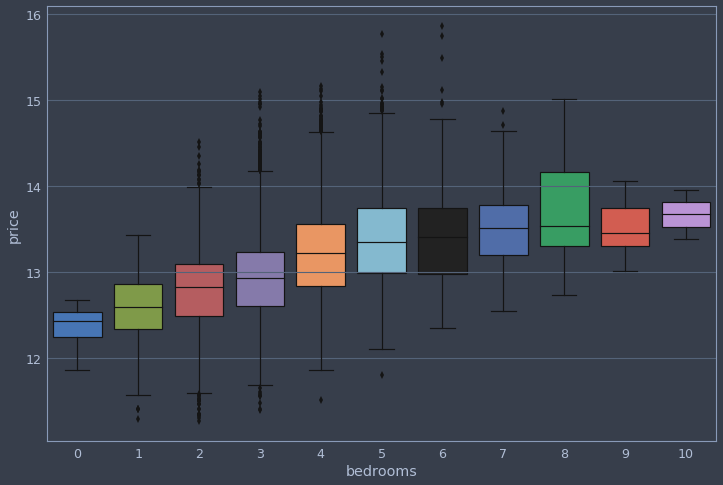

In [24]:
data = pd.concat([df_train['bedrooms'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(12,8))
sns.boxplot(x='bedrooms', y='price', data=data)

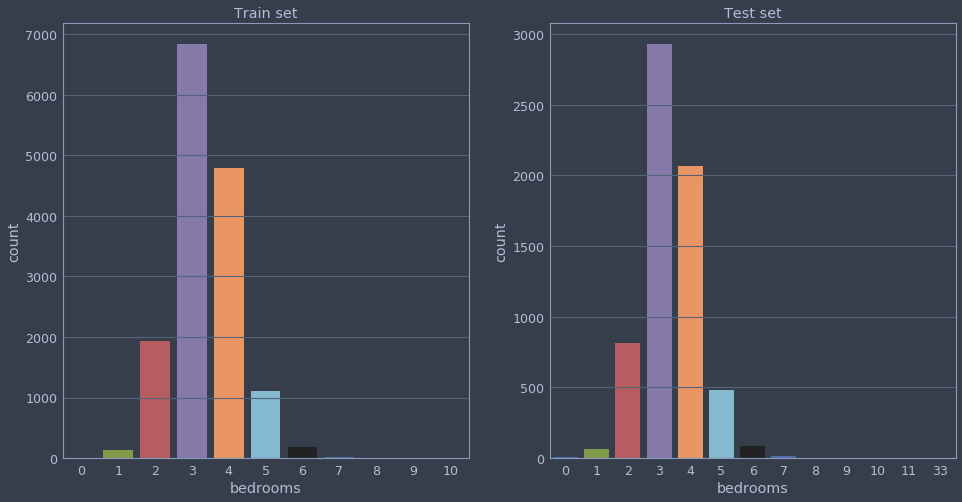

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].set(title='Train set')
sns.countplot(x='bedrooms', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='bedrooms', data=df_test, ax=ax[1])

독특하게 방 수가 30이 넘는 값들이 있고, price는 비교적 낮은 것 또한 볼 수 있다. 이러한 값들은 특정한 이유가 있어서 이렇게 된 것으로 볼 수 있다(ex)숙박시설, 외딴 지역 등).

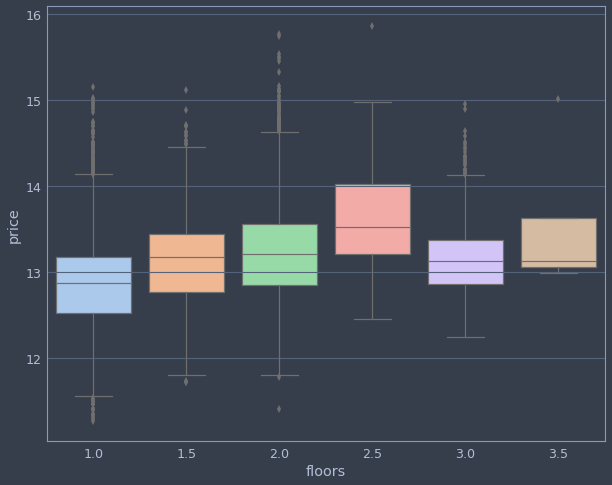

In [26]:
data = pd.concat([df_train['floors'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(10,8))
sns.boxplot(x='floors', y='price', data=data, palette=sns.color_palette('pastel'))

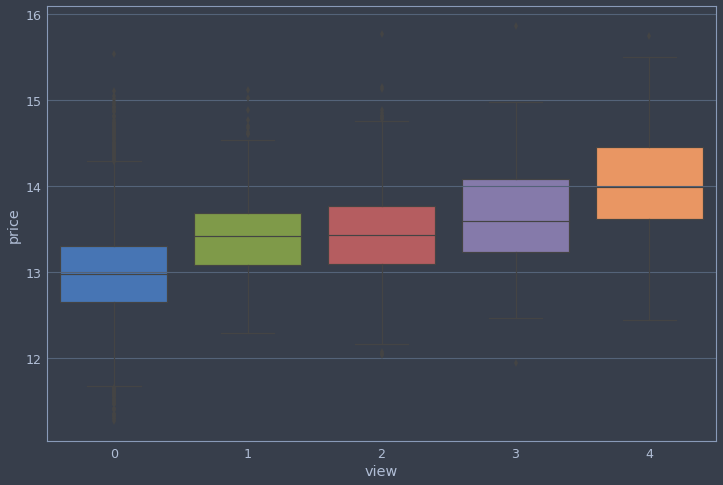

In [27]:
data = pd.concat([df_train['view'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(12,8))
sns.boxplot(x='view', y='price', data=data)

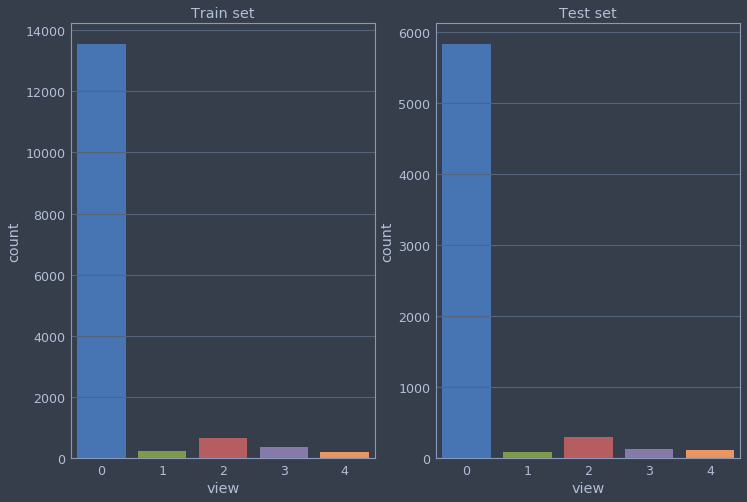

In [28]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
ax[0].set(title='Train set')
sns.countplot(x='view', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='view', data=df_test, ax=ax[1])

* 많이 보여준 방일수록 가격이 오르는것을 확인이 가능
* 분포가 대부분이 0쪽으로 치우쳐 있다.

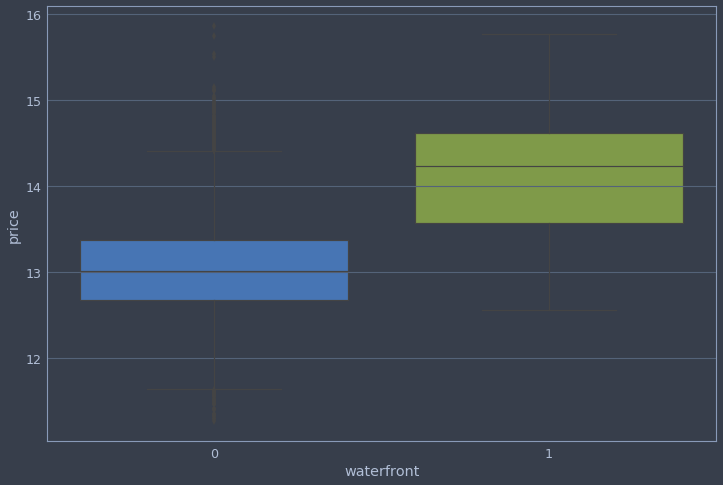

In [29]:
data = pd.concat([df_train['waterfront'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(12,8))
sns.boxplot(x='waterfront', y='price', data=data)

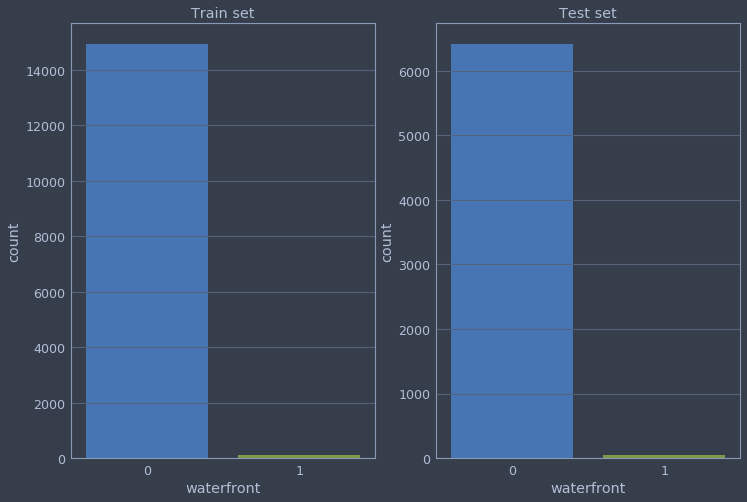

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
ax[0].set(title='Train set')
sns.countplot(x='waterfront', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='waterfront', data=df_test, ax=ax[1])

* 마찬가지로 분포가 0으로 쏠려있다.

#### 1.4 결측치

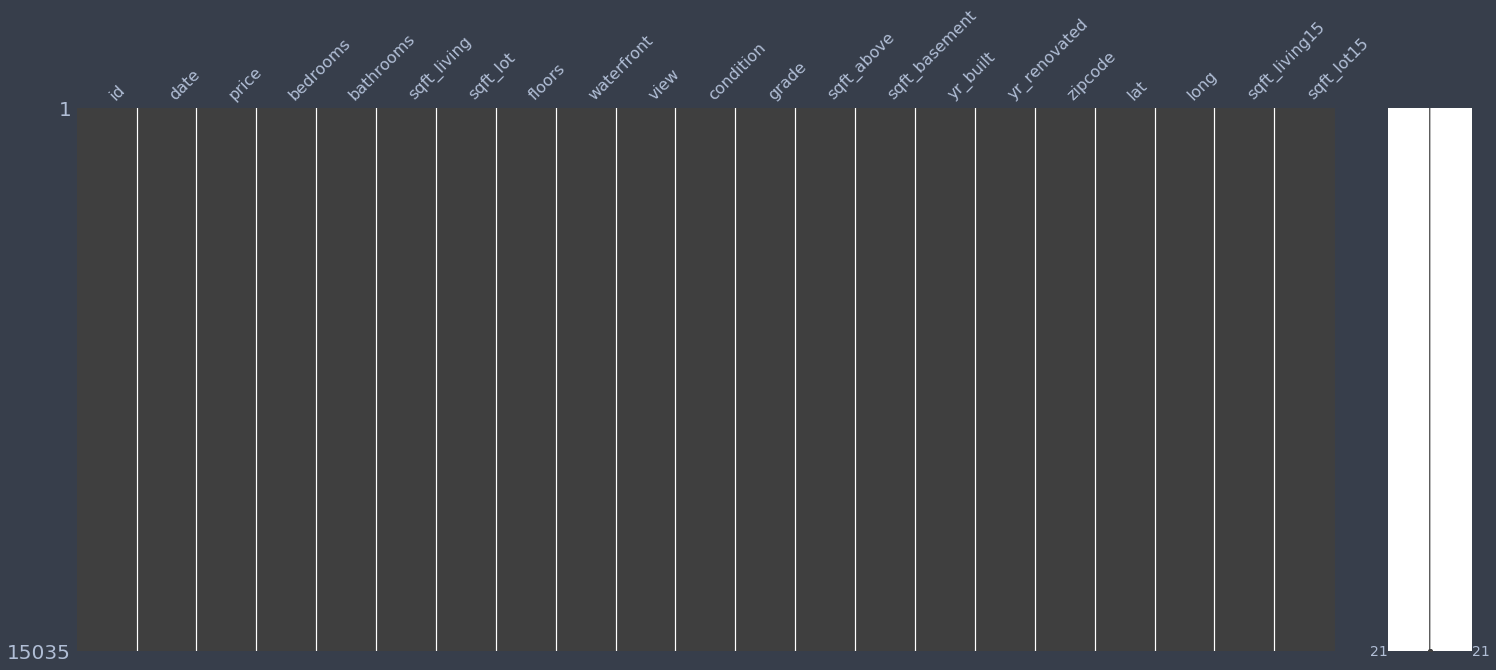

In [31]:
import missingno as msno
msno.matrix(df_train)

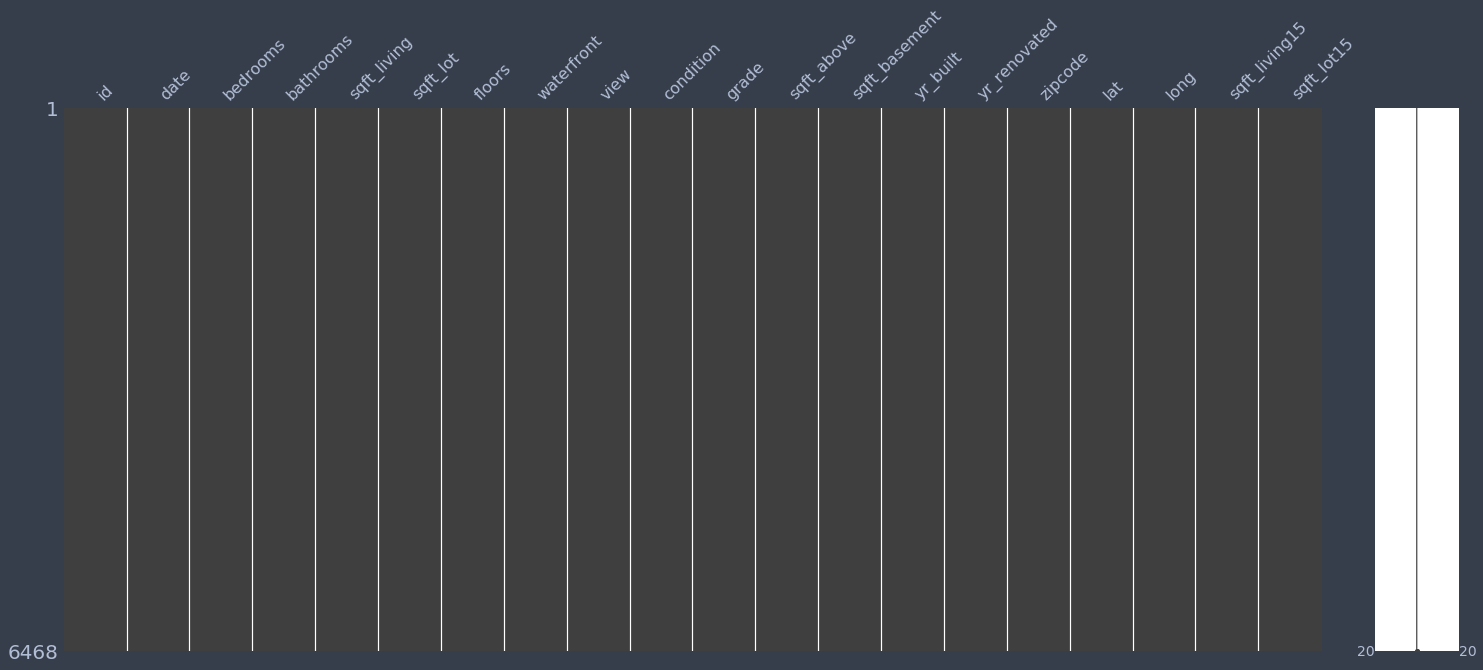

In [32]:
msno.matrix(df_test)

다행히도 결측치는 보이지 않는다.

In [33]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

In [34]:
## 유니크 갯수 계산
train_unique=[]
columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

for i in columns:
    train_unique.append(len(df_train[i].unique()))
    
unique_train = pd.DataFrame()
unique_train['Columns'] = columns
unique_train['Unique_value'] = train_unique

data = [
    go.Bar(
        x = unique_train['Columns'],
        y = unique_train['Unique_value'],
        name = 'Unique value in features',
        textfont = dict(size=20),
        marker = dict(opacity=0.45)
    )
]

layout = go.Layout(
    title = 'Unique Value By Column',
    xaxis = dict(title='Columns', ticklen=5, zeroline=False, gridwidth=2),
    yaxis = dict(title='Value Count', ticklen=5, gridwidth=2),
    showlegend = True
)

fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig, filename='skin')
py.offline.iplot(fig)

view의 유니크 개수가 5인걸로 보니 grade와 같이 순위형 변수로 생각되어지고, waterfront같은 경우는 2개로 있다, 없다를 뜻하는 것 같다.

### 2. 데이터 전처리
#### 위도, 경도 데이터 다뤄보기(참고 커널 : [https://www.kaggle.com/seriousran/google-reverse-geocoder])

In [35]:
from multiprocessing import Pool
# 오래걸리는 작업을 병렬로 여러개 실행시켜 시간을 단축시키자!
def _apply_def(args):
    df, func, kwards = args
    return df.apply(func, **kwards)

def apply_by_multiprocessing(df, func, **kwards):
    # 키워드 항목 중 workers 파라미터를 꺼냄
    workers = kwards.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수만큼 나눠서 작업
    result = pool.map(_apply_def, [(d, func, kwards) for d in np.array_split(df, workers)])
    pool.close()
    
    # 결과를 합쳐서 반환
    return pd.concat(list(result))

In [36]:
from sklearn.preprocessing import LabelEncoder
import reverse_geocoder as revgc
revgc.search((47.4973, -122.24092))

Loading formatted geocoded file...


[OrderedDict([('lat', '47.4943'),
              ('lon', '-122.24092'),
              ('name', 'Bryn Mawr-Skyway'),
              ('admin1', 'Washington'),
              ('admin2', 'King County'),
              ('cc', 'US')])]

In [37]:
df_train['geocode'] = df_train.apply(lambda row : revgc.search((row['lat'], row['long']))[0], axis=1)

In [38]:
df_test['geocode'] = df_test.apply(lambda row : revgc.search((row['lat'], row['long']))[0], axis=1)

In [39]:
%%time
# df_train['country'] = df_train.geocode['country']
df_train['admin1'] = df_train['geocode'].apply(lambda row : row['admin1'])
df_train['admin2'] = df_train['geocode'].apply(lambda row : row['admin2'])
df_train['st_name'] = df_train['geocode'].apply(lambda row : row['name'])

le_admin1 = LabelEncoder()
le_admin2 = LabelEncoder()
le_st = LabelEncoder()

le_admin1.fit(df_train['admin1'].unique())
df_train['admin1'] = le_admin1.transform(df_train['admin1'])
le_admin2.fit(df_train['admin2'].unique())
df_train['admin2'] = le_admin2.transform(df_train['admin2'])
le_st.fit(df_train['st_name'].unique())
df_train['st_name'] = le_st.transform(df_train['st_name'])

# df_train['country'] = df_test.geocode['country']
df_test['admin1'] = df_test['geocode'].apply(lambda row : row['admin1'])
df_test['admin2'] = df_test['geocode'].apply(lambda row : row['admin2'])
df_test['st_name'] = df_test['geocode'].apply(lambda row : row['name'])

le_admin1 = LabelEncoder()
le_admin2 = LabelEncoder()
le_st = LabelEncoder()

le_admin1.fit(df_test['admin1'].unique())
df_test['admin1'] = le_admin1.transform(df_test['admin1'])
le_admin2.fit(df_test['admin2'].unique())
df_test['admin2'] = le_admin2.transform(df_test['admin2'])
le_st.fit(df_test['st_name'].unique())
df_test['st_name'] = le_st.transform(df_test['st_name'])

CPU times: user 27.5 ms, sys: 3.11 ms, total: 30.7 ms
Wall time: 34 ms


In [40]:
del df_train['geocode']
del df_test['geocode']

In [41]:
del df_train['admin1']
del df_test['admin1']

In [42]:
# for df in [df_train, df_test]:
#     df['st_name'] = df['st_name'] / 10

#### 2.1 이상치 제거
위에서 중요한 변수들에 대해 다음의 변수들에 대해 이상치가 있는것을 확인할 수 있다.
* sqft_living, grade, bathrooms
<br></br>
##### 2.1.1 sqft_living

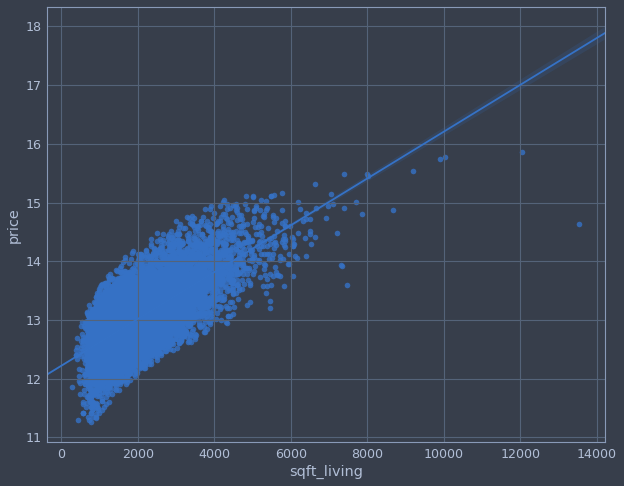

In [43]:
data = pd.concat([df_train['sqft_living'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_living', y='price', data=data)

In [44]:
df_train[df_train['sqft_living'] > 13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
8912,8912,2014-05-05,14.639686,7,8.0,13540,307752,3.0,0,4,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,0,1


위의 값을 봤을때, 다른값들에 비해 sqft_living 값만 비정상적으로 큰 것을 알 수 있다. 따라서 이 값은 이상치로 보고 제거하도록 하겠다.

In [45]:
df_train = df_train.loc[df_train['id'] != 8912]

##### 2.1.2 grade

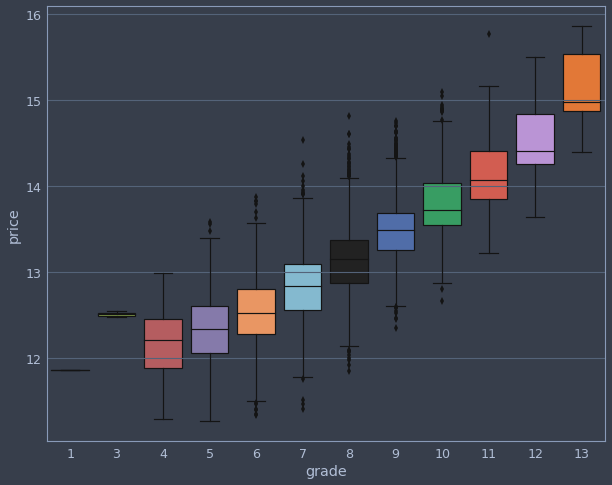

In [46]:
data = pd.concat([df_train['grade'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='grade', y='price', data=data)

In [47]:
df_train.loc[(df_train['price']>14.5) & (df_train['grade']==7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
12346,12346,2015-01-15,14.533351,4,3.25,3580,19989,1.5,1,4,...,100,1915,1965,98125,47.7087,-122.276,2410,6389,0,31


In [48]:
df_train.loc[(df_train['price']>14.7) & (df_train['grade']==8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
7173,7173,2014-08-13,14.808763,5,4.0,4230,27295,2.0,1,4,...,1000,1949,1985,98033,47.6803,-122.214,2660,27295,0,36


In [49]:
df_train.loc[(df_train['price']>15.5) & (df_train['grade']==11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
2775,2775,2014-06-11,15.77031,5,4.5,10040,37325,2.0,1,2,...,2360,1940,2001,98004,47.65,-122.214,3930,25449,0,78


위의 3개의 값 모두 특별한 이유 없이 가격이 높아 보이므로 이상치로 규정하고 제거하도록 하겠다.

In [50]:
df_train = df_train.loc[df_train['id'] != 12346]
df_train = df_train.loc[df_train['id'] != 7173]
df_train = df_train.loc[df_train['id'] != 2775]

##### 2.1.3 bedrooms

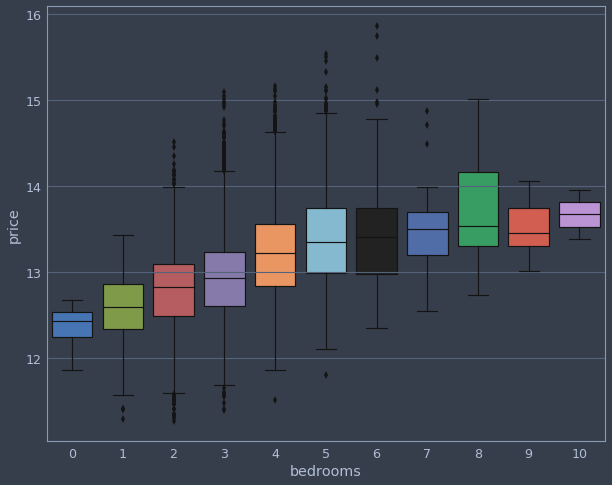

In [51]:
data = pd.concat([df_train['bedrooms'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='bedrooms', y='price', data=data)

침실의 수를 보면 9까지는 price가 증가하는 모습을 보이지만 10 이상부터는 그렇지 않다.

In [52]:
df_train.loc[df_train['bedrooms']>=10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
9280,9280,2014-08-14,13.953533,10,5.25,4590,10920,1.0,0,2,...,2090,2008,0,98004,47.5861,-122.113,2730,10400,0,74
10575,10575,2014-10-29,13.384729,10,2.00,3610,11914,2.0,0,0,...,600,1958,0,98006,47.5705,-122.175,2040,11914,0,54


In [53]:
df_test.loc[df_test['bedrooms']>=10]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
2584,17619,2014-08-21,11,3.00,3000,4960,2.0,0,0,3,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,0,75
4710,19745,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,580,1947,0,98103,47.6878,-122.331,1330,4700,0,66
5775,20810,2014-12-29,10,3.00,2920,3745,2.0,0,0,4,...,1060,1913,0,98105,47.6635,-122.320,1810,3745,0,65


실제 테스트에서는 bedrooms가 10과 같거나 큰 값이 없으므로 train에서 지우도록 하자.

In [54]:
# df_train = df_train.loc[df_train['bedrooms']<=9]

##### 2.1.4 sqft_living

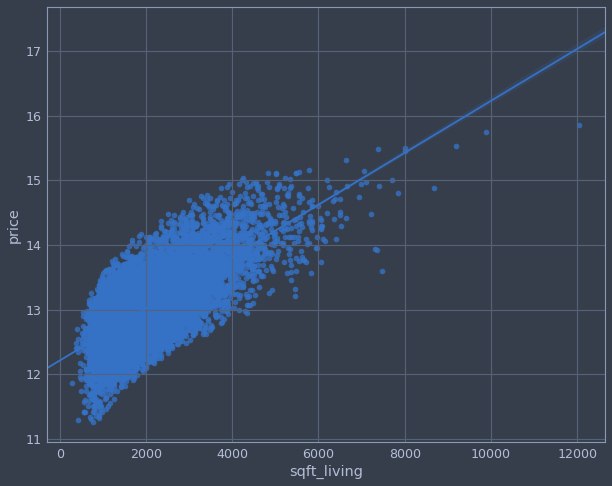

In [55]:
data = pd.concat([df_train['sqft_living'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_living', y='price', data=data)

* sqft_lot가 1200000가 넘는 데이터는 이상치로 보인다. 데이터를 살펴보자.

In [56]:
df_train[df_train['sqft_lot'] > 1200000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name
1231,1231,2015-03-27,13.458837,4,1.0,1300,1651359,1.0,0,3,...,0,1920,0,98022,47.2313,-122.023,2560,425581,0,22


15와 차이도 엄청난 것을 보니 역시 이상하다. 삭제해주도록 하자.

In [57]:
df_train = df_train.loc[df_train['sqft_lot'] < 1200000]

#### 2.2 정규화
* baseline의 링크를 활용해 편향된 데이터들을 정규화 해준다.[링크](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)

In [58]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
skew_columns2 = ['sqft_living15', 'sqft_lot15'] # 1/3 제곱시켜 정규분포에 가깝게!

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)
    
for c in skew_columns2:
    df_train[c] = np.power(df_train[c].values, 1/4)
    df_test[c] = np.power(df_test[c].values, 1/4)

In [59]:
df_train['sqft_living15'].describe()

count    15030.000000
mean         6.611869
std          0.548922
min          4.469338
25%          6.212932
50%          6.558325
75%          6.969923
max          8.877137
Name: sqft_living15, dtype: float64

#### 2.3 변수 수정

In [60]:
for df in [df_train, df_test]:
#     df['date'] = df['date'].apply(lambda x: x[0:8])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])
    df['year'] = df['year'].map({2014 : 0, 2015 : 1})
    del df['date']

### 3.변수 생성

In [61]:
df_train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,admin2,st_name,year,month,day
0,0,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,3,...,98178,47.5112,-122.257,6.050290,8.669861,0,8,0,10,13
1,1,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,3,...,98028,47.7379,-122.233,7.221746,9.475687,0,31,1,2,25
2,2,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,3,...,98074,47.6168,-122.045,6.513556,9.306979,0,12,1,2,18
3,3,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,3,...,98003,47.3097,-122.327,6.878045,9.087202,0,26,0,6,27
4,4,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,3,...,98198,47.4095,-122.315,6.373397,9.926954,0,16,1,1,15


In [62]:
for df in [df_train, df_test]:
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    # 총 면적
    df['sqft_total_size'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']
    # 면적 대비 거실 비율
#     df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    df['sqft_total15'] = df['sqft_living15'] + df['sqft_lot15']
#     df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_total15'] 

    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x==0 else 1)
#     df['date'] = df['date'].astype('int')

In [63]:
# zipcode, yr_built, yr_renovated는 레이블링 해준다.
from sklearn.preprocessing import LabelEncoder
zip_encoder = LabelEncoder().fit(df_train['zipcode'])
built_encoder = LabelEncoder().fit(df_train['yr_built'])
renovated_encoder = LabelEncoder().fit(df_train['yr_renovated'])

for df in [df_train, df_test]:
    df['zipcode'] = zip_encoder.transform(df['zipcode'])
    df['yr_built'] = built_encoder.transform(df['yr_built'])
    df['yr_renovated'] = renovated_encoder.transform(df['yr_renovated'])

아래는 집값 같은 경우에는 비슷한 지역에 영향을 받아서 그것을 코드로 구현한 것이다. 주의해야 할 점은 단순 집값이 아니라 평당 가격을 써야한다는 점이다.
* 변수를 생성해 Polynomial한 특성을 추가해 준다.

In [64]:
df_train['per_price'] = df_train['price'] / df_train['sqft_total_size']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean', 'var'}).reset_index()
df_train = pd.merge(df_train, zipcode_price, how='left', on='zipcode')
df_test = pd.merge(df_test, zipcode_price, how='left', on='zipcode')
del df_train['per_price']

# for df in [df_train, df_test]:
#     df['zipcode_mean'] = df['mean']*df['sqft_total_size']
#     df['zipcode_var'] = df['var']*df['sqft_total_size']
#     del df['mean'], df['var']

### 4. 모델링
#### 4.1 릿지 회귀

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

In [66]:
y_reg = df_train['price']
del df_train['price']
del df_train['id']
test_id = df_test['id']
del df_test['id']

In [67]:
kfolds = KFold(n_splits=10, random_state=2019, shuffle=True)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(estimator=model, X=df_train, y=y_reg, scoring='neg_mean_squared_error', cv=kfolds))
    return rmse

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(), RidgeCV(alphas=[k], cv=kfolds)).fit(df_train, y_reg)
    ridge_rmse = cv_rmse(ridge_model).mean()
    return ridge_rmse

# r_alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.01, 0.05, 0.1, 1, 3, 5, 6, 7, 8, 9, 10]

# ridge_scores = []
# for alpha in r_alphas:
#     score = ridge_selector(alpha)
#     ridge_scores.append(score)

In [68]:
# plt.plot(r_alphas, ridge_scores, label='Ridge')
# plt.xlabel('alpha')
# plt.ylabel('score')

In [69]:
# alphas_alt = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.5,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.7,2.8,2.9,3]

# ridge_model2 = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds)).fit(df_train, y_reg)

# print('Ridge rmse :', cv_rmse(ridge_model2).mean())

In [70]:
# print('Best alpha in ridge model :', ridge_model2.steps[1][1].alpha_)

In [71]:
# ridge_coef = pd.DataFrame(data=np.round(ridge_model2.steps[1][1].coef_, decimals=3), index=df_test.columns, columns=['penalized_regression_coefficients'])
# # remove the zero coefficients
# ridge_coef = ridge_coef[ridge_coef != 0]
# # sort the values from high to low
# ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', ascending=False)

# # plot the sorted dataframe
# fig = plt.figure(figsize=(25,25))
# ax = sns.barplot(x='penalized_regression_coefficients', y=ridge_coef.index, data=ridge_coef)
# ax.set(xlabel='Penalized_regression_coefficients')

#### 4.2 라쏘 회귀

In [72]:
# from sklearn.linear_model import LassoCV

# l_alphas = [0.00001, 0.00003, 0.00005, 0.00007, 0.00009, 0.0001, 0.0005, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.02, 0.05, 0.1]

# def lasso_selector(k):
#     lasso_model = make_pipeline(RobustScaler(), LassoCV(alphas=[k], cv=kfolds)).fit(df_train, y_reg)
#     lasso_rmse = cv_rmse(lasso_model).mean()
#     return lasso_rmse

In [73]:
# lasso_scores = []
# for alpha in l_alphas:
#     score = lasso_selector(alpha)
#     lasso_scores.append(score)
    
# plt.plot(l_alphas, lasso_scores, label='Lasso')
# plt.xlabel('alpha')
# plt.ylabel('score')

* 라쏘는 좋아보이지 않는다.

#### 4.3 GBM
##### 4.3.1 LightGBM

In [74]:
train_columns = [c for c in df_train.columns if c not in ['id']]

In [75]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

param = {
    'num_leaves' : 31,
    'min_data_in_leaf' : 10,
    'objective' : 'regression',
    'max_depth' : -1,
    'learning_rate' : 0.008,
    'min_child_samples' : 12,
    'boosting' : 'gbdt',
    'feature_fraction' : 0.6,
    'bagging_freq' : 1,
    'bagging_fraction' : 0.6,
    'bagging_seed' : 11,
    'metric' : 'rmse',
    'lambda_l2' : 30,
    'verbosity' : -1,
    'nthread' : -1,
    'random_state' : 2019
}

# prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=2019)
oof1 = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

# run model
for fold_, (trn_index, val_index) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(df_train.iloc[trn_index][train_columns], label=y_reg.iloc[trn_index])
    val_data = lgb.Dataset(df_train.iloc[val_index][train_columns], label=y_reg.iloc[val_index])
    
    num_round = 10000
    clf = lgb.train(params=param, train_set=trn_data, num_boost_round=num_round, valid_sets=[trn_data, val_data], verbose_eval=500, early_stopping_rounds=100)
    oof1[val_index] = clf.predict(df_train.iloc[val_index][train_columns], num_iterations=clf.best_iteration) # 나중에 스태킹을 위한 train 데이터도 된다.
    # feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df['Feature'] = train_columns
    fold_importance_df['importance'] = clf.feature_importance()
    
    fold_importance_df['fold'] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    # predictions
    predictions += clf.predict(df_test[train_columns], num_iterations=clf.best_iteration) / folds.n_splits # 나중에 스태킹을 위한 test 데이터도 된다.
    
cv = np.sqrt(mean_squared_error(oof1, y_reg))
print(cv)

Training until validation scores don't improve for 100 rounds.
[500]	training's rmse: 0.166981	valid_1's rmse: 0.182077
[1000]	training's rmse: 0.144547	valid_1's rmse: 0.167445
[1500]	training's rmse: 0.134659	valid_1's rmse: 0.163927
[2000]	training's rmse: 0.127404	valid_1's rmse: 0.162355
[2500]	training's rmse: 0.121405	valid_1's rmse: 0.161544
[3000]	training's rmse: 0.116171	valid_1's rmse: 0.161091
Early stopping, best iteration is:
[3313]	training's rmse: 0.113203	valid_1's rmse: 0.16078
Training until validation scores don't improve for 100 rounds.
[500]	training's rmse: 0.168019	valid_1's rmse: 0.175499
[1000]	training's rmse: 0.145527	valid_1's rmse: 0.160665
[1500]	training's rmse: 0.135462	valid_1's rmse: 0.157412
[2000]	training's rmse: 0.128017	valid_1's rmse: 0.155863
[2500]	training's rmse: 0.121963	valid_1's rmse: 0.155227
[3000]	training's rmse: 0.116643	valid_1's rmse: 0.154819
[3500]	training's rmse: 0.111944	valid_1's rmse: 0.154514
Early stopping, best iteration

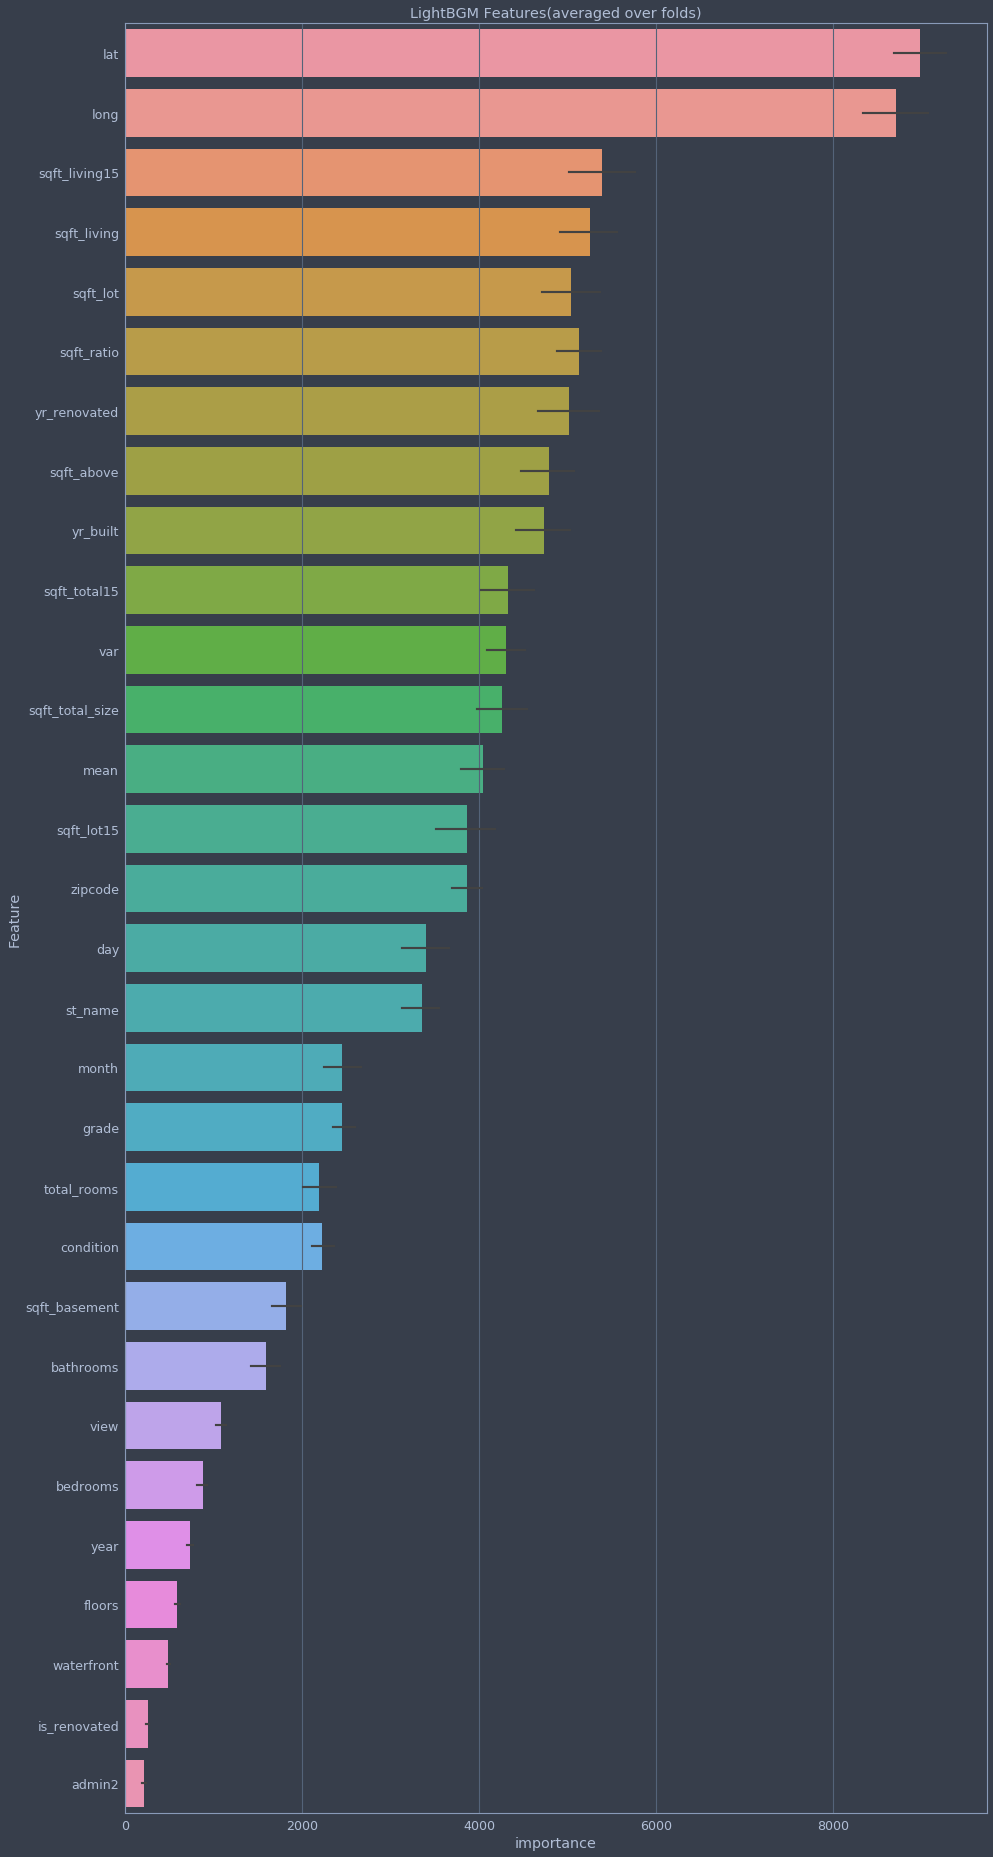

In [76]:
# plot the feature importance
cols = feature_importance_df[['Feature', 'importance']].groupby('Feature').mean().sort_values(by='importance',ascending=False)[:1000].index
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x='importance', y='Feature', data=best_features.sort_values(by='importance',ascending=False))
plt.title('LightBGM Features(averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importaces.png')

##### 4.2.2 XGBoost

In [77]:
import xgboost as xgb

params = {
    'booster' : 'gbtree',
    'max_depth': 7,
    'eta' : 0.008,
    'objective' : 'reg:linear',
    'eval_metric' : 'rmse',
    'n_thread' : -1,
    'silent' : 1,
    'gamma' : 0.01,
    'lambda' : 30,
    'sub_sample' : 0.5
}

# prepare fit model with cross-validation
oof2 = np.zeros(len(df_train))
predictions2 = np.zeros((len(df_test)))
feature_importance_df2 = pd.DataFrame()

num_rounds = 10000
for folds_, (trn_index, val_index) in enumerate(folds.split(df_train)):
    trn_dmtx = xgb.DMatrix(data=df_train.iloc[trn_index][train_columns].values, label=y_reg.iloc[trn_index].values)
    val_dmtx = xgb.DMatrix(data=df_train.iloc[val_index][train_columns].values, label=y_reg.iloc[val_index].values)
    
    wlist = [(trn_dmtx, 'train'),(val_dmtx, 'eval')]
    clf = xgb.train(params=params, dtrain=trn_dmtx, num_boost_round=num_rounds, evals=wlist, verbose_eval=100, early_stopping_rounds=100)
    oof2[val_index] = clf.predict(data=val_dmtx) # 스태킹 모델링을 위해 남겨놓는다(스태킹 모델의 훈련 데이터)
    
    # 스테킹 모델의 테스트 데이터가 된다.
    predictions2 += clf.predict(data=xgb.DMatrix(data=df_test[train_columns].values)) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof2, y_reg))
print(cv)

[0]	train-rmse:12.4599	eval-rmse:12.4533
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[100]	train-rmse:5.61143	eval-rmse:5.6053
[200]	train-rmse:2.54682	eval-rmse:2.5431
[300]	train-rmse:1.17885	eval-rmse:1.17812
[400]	train-rmse:0.575024	eval-rmse:0.578636
[500]	train-rmse:0.316459	eval-rmse:0.326479
[600]	train-rmse:0.213483	eval-rmse:0.229265
[700]	train-rmse:0.175836	eval-rmse:0.195783
[800]	train-rmse:0.161729	eval-rmse:0.184795
[900]	train-rmse:0.154009	eval-rmse:0.179062
[1000]	train-rmse:0.148698	eval-rmse:0.175451
[1100]	train-rmse:0.144515	eval-rmse:0.172915
[1200]	train-rmse:0.141303	eval-rmse:0.171337
[1300]	train-rmse:0.138412	eval-rmse:0.169896
[1400]	train-rmse:0.136057	eval-rmse:0.168843
[1500]	train-rmse:0.133846	eval-rmse:0.167976
[1600]	train-rmse:0.131637	eval-rmse:0.167196
[1700]	train-rmse:0.129551	eval-rmse:0.166438
[1800]	train-rmse:0.127734	eval-rmse:0.165849
[190

#### 4.5 랜덤포레스트(RandomForest)

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=300, random_state=2019, max_depth=15, n_jobs=-1).fit(df_train, y_reg)

In [79]:
print('RandomForest rmse:', cv_rmse(rf_reg).mean())

RandomForest rmse: 0.17705391465169767


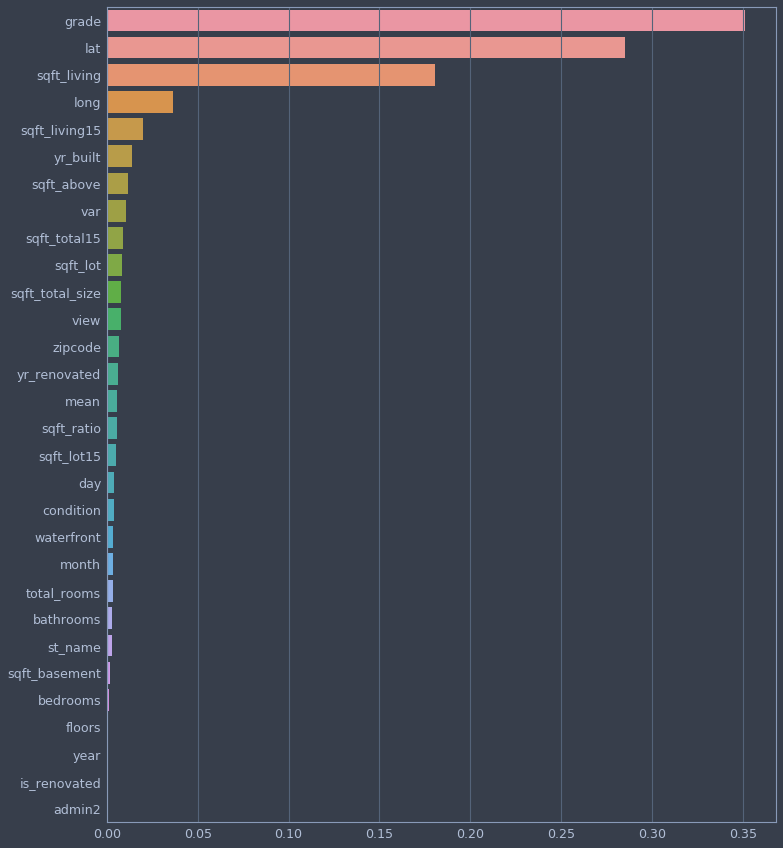

In [80]:
# plot the feature importance
feature_importance_df_rf = pd.Series(data=rf_reg.feature_importances_, index=df_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12,15), nrows=1, ncols=1)
sns.barplot(x=feature_importance_df_rf, y=feature_importance_df_rf.index, ax=ax)

#### 4.6 서포트벡터머신

In [81]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

svr_reg = make_pipeline(StandardScaler(), SVR(C=3.5)).fit(df_train, y_reg)

In [82]:
print('Support Vector Regressor rmse :', cv_rmse(svr_reg).mean())

Support Vector Regressor rmse : 0.18625615502945164


#### 4.7 ExtraTreeRegressor

In [83]:
from sklearn.tree import ExtraTreeRegressor

extra_tree_reg = ExtraTreeRegressor(criterion='mse', max_depth=15, min_samples_leaf=10, min_samples_split=10, max_features='auto',random_state=2019).fit(df_train, y_reg)

In [84]:
print('ExtraTreeRegressor rmse :', cv_rmse(extra_tree_reg).mean())

ExtraTreeRegressor rmse : 0.22698986572254154


#### 4.8 다층 퍼셉트론(Keras) [참고커널](https://www.kaggle.com/janged/keras-neural-network-0320)

In [85]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import keras.backend as K

Using TensorFlow backend.


In [86]:
# 먼저 모델링 전 데이터들을 퍼셉트론이 가장 잘 학습할 수 있도록 정규화 해주도록 하자.
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(df_train)
y_scaler = StandardScaler().fit(y_reg.values.reshape(-1,1))

x_train = x_scaler.transform(df_train)
x_test = x_scaler.transform(df_test)
y_train = y_scaler.transform(y_reg.values.reshape(-1,1))

In [87]:
print(x_train.shape[1])

30


In [88]:
np.random.seed(2019) # for reproduction

In [89]:
# root mean squared error를 평가 메트릭으로 사용하기위해 함수를 정의
def root_mean_squared_error(y_pred, y_true):
    squared_err = K.square(K.sum(y_true - y_pred, axis=0))
    mse = K.mean(squared_err)
    return K.sqrt(mse)

In [90]:
# 모델링
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(12, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal'))
    model.add(layers.Dense(6, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dense(3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dense(1))
    
    optimizer = optimizers.Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', root_mean_squared_error])
    
    return model

In [91]:
# 하이퍼 파라미터 정의
epoch = 200
patient = 20
k = 5
folds = KFold(n_splits=k, shuffle=True, random_state=2019)

In [92]:
import os
model_path = './model'

if not os.path.exists(model_path):
    os.mkdir(model_path)
    
model_path1 = model_path + 'adam_model1.hdf5'

훈련중 모델 결과를 저장할 디렉터리, 파일명

In [93]:
call_backs = [
    EarlyStopping(monitor='mse', patience=patient, mode='min', verbose=1),
    ModelCheckpoint(filepath=model_path1, monitor='mse', verbose=1, save_best_only=True, mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=patient/3, min_lr=0.000001, verbose=1, mode='min')
]

에폭은 200, 각 훈련마다 patient는 20, 5폴드 1개 모델로 하고 KFold를 사용해 Fold는 섞었다.

In [ ]:
# 스태킹 모델링을 위해
oof_percep = np.zeros(len(x_train))
prediction_percep = np.zeros(len(x_test))

# 학습
for folds_, (trn_idx, val_idx) in enumerate(folds.split(x_train)):
    print('처리중인 폴드 #', folds_)
    # 학습 데이터
    partial_train_data = x_train[trn_idx]
    partial_train_targets = y_train[trn_idx]
    
    # 검증 데이터
    val_data = x_train[val_idx]
    val_targets = y_train[val_idx]
    
    model = build_model()
    history = model.fit(partial_train_data,
                       partial_train_targets,
                       validation_data=(val_data, val_targets),
                        epochs=epoch,
                        batch_size=16,
                        callbacks=call_backs
                       )
    
    oof_percep[val_idx] = model.predict(val_data).squeeze()
    prediction_percep += model.predict(x_test).squeeze() / folds.n_splits

처리중인 폴드 # 0
Train on 12024 samples, validate on 3006 samples
Epoch 1/200
12024/12024 [==============================] - 1s 91us/step - loss: 0.5720 - mean_absolute_error: 0.5013 - root_mean_squared_error: 2.1696 - val_loss: 0.3241 - val_mean_absolute_error: 0.3684 - val_root_mean_squared_error: 1.5400
Epoch 2/200
12024/12024 [==============================] - 1s 64us/step - loss: 0.2733 - mean_absolute_error: 0.3389 - root_mean_squared_error: 1.5026 - val_loss: 0.2493 - val_mean_absolute_error: 0.3266 - val_root_mean_squared_error: 1.2956
Epoch 3/200
12024/12024 [==============================] - 1s 64us/step - loss: 0.2261 - mean_absolute_error: 0.3164 - root_mean_squared_error: 1.3099 - val_loss: 0.2175 - val_mean_absolute_error: 0.3118 - val_root_mean_squared_error: 1.2924
Epoch 4/200
12024/12024 [==============================] - 1s 64us/step - loss: 0.2035 - mean_absolute_error: 0.3062 - root_mean_squared_error: 1.3736 - val_loss: 0.2041 - val_mean_absolute_error: 0.3088 - val_roo

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend(['train', 'val'], loc='best')

In [ ]:
# 예측결과를 저장해놓는다.
# percep_model_preds = model.predict(x_test)

#### 4.6 스태킹(Stacking)

In [ ]:
# 두 종류의 모델이 필요하다.
# 하나는 지금까지 학습시킨 개별적인 기본모델들이고,
# 다른 하나는 개별 기반 모델의 예측 데이터를 학습데이터로 만들어서 학습하는 최종 메타 모델이다.

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n):
    # KFold는 위에서 만들어진것을 쓴다.
    # 추후에 메타 모델이 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((df_train.shape[0], 1))
    test_pred = np.zeros((df_test.shape[0], folds.n_splits))
    print(model.__class__.__name__, ' model 시작')
    
    for folds_, (trn_index, val_index) in enumerate(folds.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t폴드 세트: ', folds_, ' 시작')
        trn_data = X_train_n.iloc[trn_index]
        val_data = X_train_n.iloc[val_index]
        y_trn = y_train_n.iloc[trn_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(trn_data, y_trn)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[val_index,:] = model.predict(val_data).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folds_] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1)
    
    # train_fold_predsms 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [ ]:
# xgboost와 lightgbm은 각각 oof1,oof2 | predictions, predictions2 로 만들어져 있으니 RandomForest와 Ridge만 구해본다.
# ridge_train, ridge_test = get_stacking_base_datasets(ridge_model2, df_train, y_reg, df_test)
rf_train, rf_test = get_stacking_base_datasets(rf_reg, df_train, y_reg, df_test)
svr_train, svr_test = get_stacking_base_datasets(svr_reg, df_train, y_reg, df_test)
extra_train, extra_test = get_stacking_base_datasets(extra_tree_reg, df_train, y_reg, df_test)

# xgboost와 lightgbm의 앙상블도 준비해보자.
# 비율은 0.4*xgb + 0.6*lgb
oof3 = 0.6 * oof1 + 0.4 * oof2
predictions3 = 0.6 * predictions + 0.4 * predictions2

In [ ]:
oof_percep = y_scaler.inverse_transform(oof_percep)
prediction_percep = y_scaler.inverse_transform(prediction_percep)

In [ ]:
from sklearn.linear_model import Ridge

# 개별 모델이 반환한 테스트용 데이터 세트를 스태킹 형태로 결합
## 스택모델1 : 랜덤포레스트, XGB, LGB, SVR, 엑스트라 랜더마이즈 트리
# Stack_final_X_train = np.concatenate([rf_train, oof1.reshape(-1,1), oof2.reshape(-1,1), svr_train, extra_train], axis=1)
# Stack_final_X_test = np.concatenate([rf_test[:,np.newaxis], predictions[:,np.newaxis], predictions2[:,np.newaxis],
#                                     svr_test[:,np.newaxis], extra_test[:,np.newaxis]], axis=1)

## 스택모델2 : 랜덤포레스트, XGB, LGB, 0.6*LGB+0.4*XGB
# Stack_final_X_train = np.concatenate([rf_train, oof1.reshape(-1,1), oof2.reshape(-1,1), oof3.reshape(-1,1)], axis=1)
# Stack_final_X_test = np.concatenate([rf_test[:,np.newaxis], predictions[:,np.newaxis], predictions2[:,np.newaxis], predictions3[:,np.newaxis]], axis=1)

## 스택모델3 : 다층 퍼셉트론, XGB, LGB, SVR, 엑스트라 랜더마이즈 트리
# Stack_final_X_train = np.concatenate([oof_percep.reshape(-1,1), rf_train, oof1.reshape(-1,1), oof2.reshape(-1,1), svr_train, extra_train], axis=1)
# Stack_final_X_test = np.concatenate([prediction_percep[:,np.newaxis], rf_test[:,np.newaxis], predictions[:,np.newaxis], predictions2[:,np.newaxis],
#                                     svr_test[:,np.newaxis], extra_test[:,np.newaxis]], axis=1)

## 스택모델4 : 다층 퍼셉트론, XGB, LGB, SVR, 엑스트라 랜더마이즈 트리
Stack_final_X_train = np.concatenate([oof_percep.reshape(-1,1), rf_train, oof1.reshape(-1,1), oof2.reshape(-1,1), svr_train], axis=1)
Stack_final_X_test = np.concatenate([prediction_percep[:,np.newaxis], rf_test[:,np.newaxis], predictions[:,np.newaxis], predictions2[:,np.newaxis],
                                    svr_test[:,np.newaxis]], axis=1)



# print(ridge_train.squeeze().shape, rf_train.shape, oof1.shape, oof2.shape)

# 최종 메타 모델은 릿지 모델을 적용
meta_model_ridge = Ridge(alpha=0.1)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측
meta_model_ridge.fit(Stack_final_X_train, y_reg)
final = meta_model_ridge.predict(Stack_final_X_test)

In [ ]:
# test_ridge_preds = np.expm1(ridge_model2.predict(df_test))
# test_rf_preds = np.expm1(rf_reg.predict(df_test))
# test_lgb_preds = np.expm1(predictions)
# test_xgb_preds = np.expm1(predictions2)
# rest_ensemble_preds = 0.6*test_lgb_preds + 0.4*test_xgb_preds
# percep_inv_model_preds = np.expm1(y_scaler.inverse_transform(percep_model_preds))

stack_preds = np.expm1(final)

In [ ]:
# submission0 = pd.DataFrame({'id' : test_id, 'price' : test_ridge_preds})
# submission0.to_csv('ridge.csv', index=False)

In [ ]:
# submission0 = pd.DataFrame({'id' : test_id, 'price' : test_lgb_preds})
# submission0.to_csv('lgb.csv', index=False)

In [ ]:
# submission0 = pd.DataFrame({'id' : test_id, 'price' : test_xgb_preds})
# submission0.to_csv('xgb.csv', index=False)

In [ ]:
# submission0 = pd.DataFrame({'id' : test_id, 'price' : rest_ensemble_preds})
# submission0.to_csv('ensemble.csv', index=False)

In [ ]:
# submission0 = pd.DataFrame({'id': test_id, 'price' : test_rf_preds})
# submission0.to_csv('rf.csv', index=False)

In [ ]:
# submission0 = pd.DataFrame({'id': test_id, 'price' : percep_inv_model_preds.squeeze()})
# submission0.to_csv('percep_keras.csv', index=False)

In [ ]:
# 스택모델1 : 릿지, 랜덤포레스트, XGB, LGB
submission0 = pd.DataFrame({'id': test_id, 'price' : stack_preds})
submission0.to_csv('stacking(percep,rf,xgb,lgb,svr).csv', index=False)
print('끝!')

In [ ]:
# 스택모델2 : 랜덤포레스트, XGB, LGB, 0.6*LGB+0.4*XGB
# submission0 = pd.DataFrame({'id': test_id, 'price' : stack_preds})
# submission0.to_csv('stacking(rf,xgb,lgb,ensemble).csv', index=False)